# Параллельные вычисления

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Параллельные вычисления"
* https://docs.python.org/3/library/multiprocessing.html
    * https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Process
    * https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool
    * https://docs.python.org/3/library/multiprocessing.html#multiprocessing.Queue
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* https://numpy.org/doc/stable/reference/generated/numpy.array_split.html
* https://nalepae.github.io/pandarallel/
    * https://github.com/nalepae/pandarallel/blob/master/docs/examples_windows.ipynb
    * https://github.com/nalepae/pandarallel/blob/master/docs/examples_mac_linux.ipynb

## Задачи для совместного разбора

In [1]:
import multiprocessing, re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
!pip install pandarallel

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 110.5/110.5 kB 494.0 kB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.3-py3-none-any.whl size=16461 sha256=d97985fcdbf0a0da3d3fa7b94750e5dd86b94f318ec2df2a1650fd1a416d775b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\66\69\3f\d563bce72ab17473f57a2c59ef94ee126a2dc5592f41ddf5e2
Successfully built pandarallel


1. Посчитайте, сколько раз встречается буква "a" в файлах ["xaa", "xab", "xac", "xad"]. 

In [2]:
files = [f"data/{name}.txt" for name in ["xaa", "xab", "xac", "xad"]]

2. Выведите на экран слова из файла words_alpha, в которых есть две или более буквы "e" подряд.

In [28]:
import pandas as pd

words = (
    pd.read_csv("data/words_alpha.txt", header=None)[0]
    .dropna()
    .sample(frac=1, replace=True)
)

## Лабораторная работа 10

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy` и `pandas`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy` или структур `pandas` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

1\. В каждой строке файла `tag_nsteps.csv` хранится информация о тэге рецепта и количестве шагов в этом рецепте в следующем виде:

```
tags,n_steps
hungarian,2
european,6
occasion,4
pumpkin,4
................
```

Всего в исходном файле хранится чуть меньше, чем 71 млн, строк. Разбейте файл `tag_nsteps.csv` на несколько (например, 8) примерно одинаковых по объему файлов c названиями `tag_nsteps_*.csv`, где вместо символа `*` указан номер очередного файла. Каждый файл имеет структуру, аналогичную оригинальному файлу (включая заголовок).

__Важно__: здесь и далее вы не можете загружать в память весь исходный файл сразу.

In [3]:
tags = pd.read_csv('data/tag_nsteps.csv')

In [11]:
iloc_for_tags = np.linspace(0, len(tags), 9).astype('int')
iloc_for_tags

array([       0,  8836948, 17673896, 26510844, 35347792, 44184740,
       53021688, 61858636, 70695585])

In [12]:
tags.iloc[:iloc_for_tags[1]].to_csv('new_data/tag_nsteps_1.csv')
tags.iloc[iloc_for_tags[1]:iloc_for_tags[2]].to_csv('new_data/tag_nsteps_2.csv')
tags.iloc[iloc_for_tags[2]:iloc_for_tags[3]].to_csv('new_data/tag_nsteps_3.csv')
tags.iloc[iloc_for_tags[3]:iloc_for_tags[4]].to_csv('new_data/tag_nsteps_4.csv')
tags.iloc[iloc_for_tags[4]:iloc_for_tags[5]].to_csv('new_data/tag_nsteps_5.csv')
tags.iloc[iloc_for_tags[5]:iloc_for_tags[6]].to_csv('new_data/tag_nsteps_6.csv')
tags.iloc[iloc_for_tags[6]:iloc_for_tags[7]].to_csv('new_data/tag_nsteps_7.csv')
tags.iloc[iloc_for_tags[7]:].to_csv('new_data/tag_nsteps_8.csv')

2\. Напишите функцию, которая принимает на вход название файла, созданного в результате решения задачи 1, считает для каждого тэга сумму по столбцу `n_steps` и количество строк c этим тэгом, и возвращает результат в виде словаря. Ожидаемый вид итогового словаря:

```
{
    '1-day-or-more': {'sum': 56616, 'count': 12752},
    '15-minutes-or-less': {'sum': 195413, 'count': 38898},
    '3-steps-or-less': {'sum': 187938, 'count': 39711},
    ....
}
```

Примените данную функцию к каждому файлу, полученному в задании 1, и соберите результат в виде списка словарей. Не используйте параллельных вычислений. 

Выведите на экран значение по ключу "30-minutes-or-less" для каждого из словарей.

In [25]:
def get_tag_sum_count_from_file(file: str) -> dict:
    return pd.read_csv(file, index_col=0).groupby(by='tags').agg(['sum', 'count'])['n_steps'].to_dict('index')

In [30]:
tags_sum_count_1 = get_tag_sum_count_from_file('new_data/tag_nsteps_1.csv')
tags_sum_count_2 = get_tag_sum_count_from_file('new_data/tag_nsteps_2.csv')
tags_sum_count_3 = get_tag_sum_count_from_file('new_data/tag_nsteps_3.csv')
tags_sum_count_4 = get_tag_sum_count_from_file('new_data/tag_nsteps_4.csv')
tags_sum_count_5 = get_tag_sum_count_from_file('new_data/tag_nsteps_5.csv')
tags_sum_count_6 = get_tag_sum_count_from_file('new_data/tag_nsteps_6.csv')
tags_sum_count_7 = get_tag_sum_count_from_file('new_data/tag_nsteps_7.csv')
tags_sum_count_8 = get_tag_sum_count_from_file('new_data/tag_nsteps_8.csv')
tags_sum_count_1

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


{'1-day-or-more': {'sum': 56402, 'count': 12707},
 '15-minutes-or-less': {'sum': 194344, 'count': 38706},
 '3-steps-or-less': {'sum': 187016, 'count': 39518},
 '30-minutes-or-less': {'sum': 347663, 'count': 45422},
 '4-hours-or-less': {'sum': 428105, 'count': 42502},
 '5-ingredients-or-less': {'sum': 178969, 'count': 33685},
 '60-minutes-or-less': {'sum': 520080, 'count': 54990},
 'Throw the ultimate fiesta with this sopaipillas recipe from Food.com.': {'sum': 39811,
  'count': 11400},
 'a1-sauce': {'sum': 39877, 'count': 11312},
 'african': {'sum': 56935, 'count': 13092},
 'american': {'sum': 231342, 'count': 30624},
 'amish-mennonite': {'sum': 40520, 'count': 11366},
 'angolan': {'sum': 39386, 'count': 11240},
 'appetizers': {'sum': 149517, 'count': 23914},
 'apples': {'sum': 69196, 'count': 14258},
 'april-fools-day': {'sum': 39109, 'count': 11185},
 'argentine': {'sum': 40616, 'count': 11347},
 'artichoke': {'sum': 40221, 'count': 11498},
 'asian': {'sum': 127185, 'count': 19754},


In [31]:
tags_sum_count_1['30-minutes-or-less']

{'sum': 347663, 'count': 45422}

In [32]:
tags_sum_count_2['30-minutes-or-less']

{'sum': 348230, 'count': 45827}

In [33]:
tags_sum_count_3['30-minutes-or-less']

{'sum': 352485, 'count': 46136}

In [34]:
tags_sum_count_4['30-minutes-or-less']

{'sum': 346169, 'count': 45423}

In [35]:
tags_sum_count_5['30-minutes-or-less']

{'sum': 344724, 'count': 45414}

In [36]:
tags_sum_count_6['30-minutes-or-less']

{'sum': 349181, 'count': 45883}

In [37]:
tags_sum_count_7['30-minutes-or-less']

{'sum': 345148, 'count': 45606}

In [38]:
tags_sum_count_8['30-minutes-or-less']

{'sum': 349605, 'count': 46071}

In [40]:
list_dict_tags_sum_count = [tags_sum_count_1, tags_sum_count_2, tags_sum_count_3, tags_sum_count_4,
                            tags_sum_count_5, tags_sum_count_6, tags_sum_count_7, tags_sum_count_8]

3\. Напишите функцию, которая объединяет результаты обработки отдельных файлов. Данная функция принимает на вход список словарей, каждый из которых является результатом вызова функции `get_tag_sum_count_from_file` для конкретного файла, и агрегирует эти словари. Не используйте параллельных вычислений.

Процедура агрегации словарей имеет следующий вид:
$$d_{agg}[k] = \{sum: \sum_{i=1}^{n}d_{i}[k][sum], count: \sum_{i=1}^{n}d_{i}[k][count]\}$$
где $d_1, d_2, ..., d_n$- результат вызова функции `get_tag_sum_count_from_file` для конкретных файлов.

Примените данную функцию к результату выполнения задания 2. Выведите на экран результат для тэга "30-minutes-or-less".

In [43]:
def agg_results(tag_sum_count_list: list) -> dict:
    list_keys_all = []

    for dic in tag_sum_count_list:
        list_keys_all += list(dic.keys())
    list_keys_all = list(set(list_keys_all))
    dict_keys_all = {key: {'sum': 0, 'count': 0} for key in list_keys_all}

    for inner_dic in tag_sum_count_list:
        for k, v in inner_dic.items():
            dict_keys_all[k]['sum'] += v['sum']
            dict_keys_all[k]['count'] += v['count']
    return dict_keys_all

In [44]:
all_results_list_dict_tags_sum_count = agg_results(list_dict_tags_sum_count)

In [45]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

{'sum': 2783205, 'count': 365782}

4\. Напишите функцию, которая считает среднее значение количества шагов для каждого тэга в словаре, имеющего вид, аналогичный словарям в задаче 2, и возвращает результат в виде словаря . Используйте решения задач 1-3, чтобы получить среднее значение количества шагов каждого тэга для всего датасета, имея результаты обработки частей датасета и результат их агрегации. Выведите на экран результат для тэга "30-minutes-or-less".

Определите, за какое время задача решается для всего датасета. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [47]:
def get_tag_mean_n_steps(tag_sum_count: dict) -> dict:
    for k, v in tag_sum_count.items():
        tag_sum_count[k] = v['sum'] / v['count']
    return tag_sum_count

In [48]:
%%timeit

tags_sum_count_1 = get_tag_sum_count_from_file('new_data/tag_nsteps_1.csv')
tags_sum_count_2 = get_tag_sum_count_from_file('new_data/tag_nsteps_2.csv')
tags_sum_count_3 = get_tag_sum_count_from_file('new_data/tag_nsteps_3.csv')
tags_sum_count_4 = get_tag_sum_count_from_file('new_data/tag_nsteps_4.csv')
tags_sum_count_5 = get_tag_sum_count_from_file('new_data/tag_nsteps_5.csv')
tags_sum_count_6 = get_tag_sum_count_from_file('new_data/tag_nsteps_6.csv')
tags_sum_count_7 = get_tag_sum_count_from_file('new_data/tag_nsteps_7.csv')
tags_sum_count_8 = get_tag_sum_count_from_file('new_data/tag_nsteps_8.csv')

list_dict_tags_sum_count = [tags_sum_count_1, tags_sum_count_2, tags_sum_count_3, tags_sum_count_4,
                            tags_sum_count_5, tags_sum_count_6, tags_sum_count_7, tags_sum_count_8]

all_results_list_dict_tags_sum_count = agg_results(list_dict_tags_sum_count)

get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


34.7 s ± 3.51 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

7.608917333275011

5\. Повторите решение задачи 4, распараллелив вызовы функции `get_tag_sum_count_from_file` для различных файлов с помощью `multiprocessing.Pool`. Для обработки каждого файла создайте свой собственный процесс. Выведите на экран результат для тэга "30-minutes-or-less". Определите, за какое время задача решается для всех файлов. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [56]:
%%file get_tag_sum_count_from_file.py
import pandas as pd
def get_tag_sum_count_from_file(file: str) -> dict:
    df = pd.read_csv(file, index_col = 0)
    all_dict = df.groupby(by = 'tags').agg(['sum', 'count'])['n_steps'].to_dict('index')
    return all_dict

Overwriting get_tag_sum_count_from_file.py


In [57]:
from get_tag_sum_count_from_file import get_tag_sum_count_from_file

In [58]:
%%timeit
with multiprocessing.Pool(processes = 8) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['new_data/tag_nsteps_1.csv', 'new_data/tag_nsteps_2.csv',
                                                 'new_data/tag_nsteps_3.csv', 'new_data/tag_nsteps_4.csv',
                                                 'new_data/tag_nsteps_5.csv', 'new_data/tag_nsteps_6.csv',
                                                 'new_data/tag_nsteps_7.csv', 'new_data/tag_nsteps_8.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

7.6 s ± 264 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

7.608917333275011

6\. Повторите решение задачи 4, распараллелив вычисления функции `get_tag_sum_count_from_file` для различных файлов с помощью `multiprocessing.Process`. Для обработки каждого файла создайте свой собственный процесс. Для обмена данными между процессами используйте `multiprocessing.Queue`.

Выведите на экран результат для тэга "30-minutes-or-less". Определите, за какое время задача решается для всех файлов. При замере времени учитывайте время расчета статистики для каждого файла, агрегации результатов и, собственно, вычисления средного. Временем, затрачиваемым на процедуру разбиения исходного файла можно пренебречь.

In [61]:
%%file upgrade_get_tag_sum_count_from_file.py
import pandas as pd

def upgrade_get_tag_sum_count_from_file(file: str, queue) -> dict:
    df = pd.read_csv(file, index_col = 0)
    all_dict = df.groupby(by = 'tags').agg(['sum', 'count'])['n_steps'].to_dict('index')
    queue.put(all_dict)

Overwriting upgrade_get_tag_sum_count_from_file.py


In [62]:
from upgrade_get_tag_sum_count_from_file import upgrade_get_tag_sum_count_from_file

In [66]:
%%timeit

ps = []
queue = multiprocessing.Queue()
for file in ['new_data/tag_nsteps_1.csv', 'new_data/tag_nsteps_2.csv',
             'new_data/tag_nsteps_3.csv', 'new_data/tag_nsteps_4.csv',
             'new_data/tag_nsteps_5.csv', 'new_data/tag_nsteps_6.csv',
             'new_data/tag_nsteps_7.csv', 'new_data/tag_nsteps_8.csv']:
    p = multiprocessing.Process(target = upgrade_get_tag_sum_count_from_file, args = (file, queue))
    ps.append(p)
    p.start()

res = []
while len(res) < 8:
    if not queue.empty():
        res.append(queue.get())

for p in ps:
    p.join()

all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

7.68 s ± 249 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
all_results_list_dict_tags_sum_count['30-minutes-or-less']

7.608917333275011

7\. Исследуйте, как влияет количество запущенных одновременно процессов на скорость решения задачи. Узнайте количество ядер вашего процессора $K$. Повторите решение задачи 1, разбив исходный файл на $\frac{K}{2}$, $K$ и $2K$ фрагментов. Для каждого из разбиений повторите решение задачи 5. Визуализируйте зависимость времени выполнения кода от количества файлов в разбиении. Сделайте вывод в виде текстового комментария.

In [95]:
K = 12
#не буду делать для 8, тк уже делал в первом задании
iloc_for_tags_for_2 = np.linspace(0, len(tags), 3).astype('int')
iloc_for_tags_for_4 = np.linspace(0, len(tags), 5).astype('int')
iloc_for_tags_for_6 = np.linspace(0, len(tags), 7).astype('int')
iloc_for_tags_for_12 = np.linspace(0, len(tags), 13).astype('int')
iloc_for_tags_for_16 = np.linspace(0, len(tags), 17).astype('int')
iloc_for_tags_for_24 = np.linspace(0, len(tags), 25).astype('int')

In [69]:
tags.iloc[:iloc_for_tags_for_2[1]].to_csv('new_data/tag_nsteps_1_for_2.csv')
tags.iloc[iloc_for_tags_for_2[1]:].to_csv('new_data/tag_nsteps_2_for_2.csv')

In [72]:
tags.iloc[:iloc_for_tags_for_4[1]].to_csv('new_data/tag_nsteps_1_for_4.csv')
tags.iloc[iloc_for_tags_for_4[1]:iloc_for_tags_for_4[2]].to_csv('new_data/tag_nsteps_2_for_4.csv')
tags.iloc[iloc_for_tags_for_4[2]:iloc_for_tags_for_4[3]].to_csv('new_data/tag_nsteps_3_for_4.csv')
tags.iloc[iloc_for_tags_for_4[3]:].to_csv('new_data/tag_nsteps_4_for_4.csv')

In [96]:
tags.iloc[:iloc_for_tags_for_6[1]].to_csv('new_data/tag_nsteps_1_for_6.csv')
tags.iloc[iloc_for_tags_for_6[1]:iloc_for_tags_for_6[2]].to_csv('new_data/tag_nsteps_2_for_6.csv')
tags.iloc[iloc_for_tags_for_6[2]:iloc_for_tags_for_6[3]].to_csv('new_data/tag_nsteps_3_for_6.csv')
tags.iloc[iloc_for_tags_for_6[3]:iloc_for_tags_for_6[4]].to_csv('new_data/tag_nsteps_4_for_6.csv')
tags.iloc[iloc_for_tags_for_6[4]:iloc_for_tags_for_6[5]].to_csv('new_data/tag_nsteps_5_for_6.csv')
tags.iloc[iloc_for_tags_for_6[5]:].to_csv('new_data/tag_nsteps_6_for_6.csv')

In [87]:
tags.iloc[:iloc_for_tags_for_12[1]].to_csv('new_data/tag_nsteps_1_for_12.csv')
tags.iloc[iloc_for_tags_for_12[1]:iloc_for_tags_for_12[2]].to_csv('new_data/tag_nsteps_2_for_12.csv')
tags.iloc[iloc_for_tags_for_12[2]:iloc_for_tags_for_12[3]].to_csv('new_data/tag_nsteps_3_for_12.csv')
tags.iloc[iloc_for_tags_for_12[3]:iloc_for_tags_for_12[4]].to_csv('new_data/tag_nsteps_4_for_12.csv')
tags.iloc[iloc_for_tags_for_12[4]:iloc_for_tags_for_12[5]].to_csv('new_data/tag_nsteps_5_for_12.csv')
tags.iloc[iloc_for_tags_for_12[5]:iloc_for_tags_for_12[6]].to_csv('new_data/tag_nsteps_6_for_12.csv')
tags.iloc[iloc_for_tags_for_12[6]:iloc_for_tags_for_12[7]].to_csv('new_data/tag_nsteps_7_for_12.csv')
tags.iloc[iloc_for_tags_for_12[7]:iloc_for_tags_for_12[8]].to_csv('new_data/tag_nsteps_8_for_12.csv')
tags.iloc[iloc_for_tags_for_12[8]:iloc_for_tags_for_12[9]].to_csv('new_data/tag_nsteps_9_for_12.csv')
tags.iloc[iloc_for_tags_for_12[9]:iloc_for_tags_for_12[10]].to_csv('new_data/tag_nsteps_10_for_12.csv')
tags.iloc[iloc_for_tags_for_12[10]:iloc_for_tags_for_12[11]].to_csv('new_data/tag_nsteps_11_for_12.csv')
tags.iloc[iloc_for_tags_for_12[11]:].to_csv('new_data/tag_nsteps_12_for_12.csv')

In [75]:
tags.iloc[:iloc_for_tags_for_16[1]].to_csv('new_data/tag_nsteps_1_for_16.csv')
tags.iloc[iloc_for_tags_for_16[1]:iloc_for_tags_for_16[2]].to_csv('new_data/tag_nsteps_2_for_16.csv')
tags.iloc[iloc_for_tags_for_16[2]:iloc_for_tags_for_16[3]].to_csv('new_data/tag_nsteps_3_for_16.csv')
tags.iloc[iloc_for_tags_for_16[3]:iloc_for_tags_for_16[4]].to_csv('new_data/tag_nsteps_4_for_16.csv')
tags.iloc[iloc_for_tags_for_16[4]:iloc_for_tags_for_16[5]].to_csv('new_data/tag_nsteps_5_for_16.csv')
tags.iloc[iloc_for_tags_for_16[5]:iloc_for_tags_for_16[6]].to_csv('new_data/tag_nsteps_6_for_16.csv')
tags.iloc[iloc_for_tags_for_16[6]:iloc_for_tags_for_16[7]].to_csv('new_data/tag_nsteps_7_for_16.csv')
tags.iloc[iloc_for_tags_for_16[7]:iloc_for_tags_for_16[8]].to_csv('new_data/tag_nsteps_8_for_16.csv')
tags.iloc[iloc_for_tags_for_16[8]:iloc_for_tags_for_16[9]].to_csv('new_data/tag_nsteps_9_for_16.csv')
tags.iloc[iloc_for_tags_for_16[9]:iloc_for_tags_for_16[10]].to_csv('new_data/tag_nsteps_10_for_16.csv')
tags.iloc[iloc_for_tags_for_16[10]:iloc_for_tags_for_16[11]].to_csv('new_data/tag_nsteps_11_for_16.csv')
tags.iloc[iloc_for_tags_for_16[11]:iloc_for_tags_for_16[12]].to_csv('new_data/tag_nsteps_12_for_16.csv')
tags.iloc[iloc_for_tags_for_16[12]:iloc_for_tags_for_16[13]].to_csv('new_data/tag_nsteps_13_for_16.csv')
tags.iloc[iloc_for_tags_for_16[13]:iloc_for_tags_for_16[14]].to_csv('new_data/tag_nsteps_14_for_16.csv')
tags.iloc[iloc_for_tags_for_16[14]:iloc_for_tags_for_16[15]].to_csv('new_data/tag_nsteps_15_for_16.csv')
tags.iloc[iloc_for_tags_for_16[15]:].to_csv('new_data/tag_nsteps_16_for_16.csv')

In [98]:
tags.iloc[:iloc_for_tags_for_24[1]].to_csv('new_data/tag_nsteps_1_for_24.csv')
tags.iloc[iloc_for_tags_for_24[1]:iloc_for_tags_for_24[2]].to_csv('new_data/tag_nsteps_2_for_24.csv')
tags.iloc[iloc_for_tags_for_24[2]:iloc_for_tags_for_24[3]].to_csv('new_data/tag_nsteps_3_for_24.csv')
tags.iloc[iloc_for_tags_for_24[3]:iloc_for_tags_for_24[4]].to_csv('new_data/tag_nsteps_4_for_24.csv')
tags.iloc[iloc_for_tags_for_24[4]:iloc_for_tags_for_24[5]].to_csv('new_data/tag_nsteps_5_for_24.csv')
tags.iloc[iloc_for_tags_for_24[5]:iloc_for_tags_for_24[6]].to_csv('new_data/tag_nsteps_6_for_24.csv')
tags.iloc[iloc_for_tags_for_24[6]:iloc_for_tags_for_24[7]].to_csv('new_data/tag_nsteps_7_for_24.csv')
tags.iloc[iloc_for_tags_for_24[7]:iloc_for_tags_for_24[8]].to_csv('new_data/tag_nsteps_8_for_24.csv')
tags.iloc[iloc_for_tags_for_24[8]:iloc_for_tags_for_24[9]].to_csv('new_data/tag_nsteps_9_for_24.csv')
tags.iloc[iloc_for_tags_for_24[9]:iloc_for_tags_for_24[10]].to_csv('new_data/tag_nsteps_10_for_24.csv')
tags.iloc[iloc_for_tags_for_24[10]:iloc_for_tags_for_24[11]].to_csv('new_data/tag_nsteps_11_for_24.csv')
tags.iloc[iloc_for_tags_for_24[11]:iloc_for_tags_for_24[12]].to_csv('new_data/tag_nsteps_12_for_24.csv')
tags.iloc[iloc_for_tags_for_24[12]:iloc_for_tags_for_24[13]].to_csv('new_data/tag_nsteps_13_for_24.csv')
tags.iloc[iloc_for_tags_for_24[13]:iloc_for_tags_for_24[14]].to_csv('new_data/tag_nsteps_14_for_24.csv')
tags.iloc[iloc_for_tags_for_24[14]:iloc_for_tags_for_24[15]].to_csv('new_data/tag_nsteps_15_for_24.csv')
tags.iloc[iloc_for_tags_for_24[15]:iloc_for_tags_for_24[16]].to_csv('new_data/tag_nsteps_16_for_24.csv')
tags.iloc[iloc_for_tags_for_24[16]:iloc_for_tags_for_24[17]].to_csv('new_data/tag_nsteps_17_for_24.csv')
tags.iloc[iloc_for_tags_for_24[17]:iloc_for_tags_for_24[18]].to_csv('new_data/tag_nsteps_18_for_24.csv')
tags.iloc[iloc_for_tags_for_24[18]:iloc_for_tags_for_24[19]].to_csv('new_data/tag_nsteps_19_for_24.csv')
tags.iloc[iloc_for_tags_for_24[19]:iloc_for_tags_for_24[20]].to_csv('new_data/tag_nsteps_20_for_24.csv')
tags.iloc[iloc_for_tags_for_24[20]:iloc_for_tags_for_24[21]].to_csv('new_data/tag_nsteps_21_for_24.csv')
tags.iloc[iloc_for_tags_for_24[21]:iloc_for_tags_for_24[22]].to_csv('new_data/tag_nsteps_22_for_24.csv')
tags.iloc[iloc_for_tags_for_24[22]:iloc_for_tags_for_24[23]].to_csv('new_data/tag_nsteps_23_for_24.csv')
tags.iloc[iloc_for_tags_for_24[23]:].to_csv('new_data/tag_nsteps_24_for_24.csv')

In [77]:
%%timeit
with multiprocessing.Pool(processes = 2) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['new_data/tag_nsteps_1_for_2.csv', 'new_data/tag_nsteps_2_for_2.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

17.6 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
%%timeit
with multiprocessing.Pool(processes = 4) as pool:
    res = pool.map(get_tag_sum_count_from_file, ["new_data/tag_nsteps_1_for_4.csv", "new_data/tag_nsteps_2_for_4.csv",
                                                "new_data/tag_nsteps_3_for_4.csv", "new_data/tag_nsteps_4_for_4.csv"])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

10 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
%%timeit
with multiprocessing.Pool(processes = 6) as pool:
    res = pool.map(get_tag_sum_count_from_file, ["new_data/tag_nsteps_1_for_6.csv", "new_data/tag_nsteps_2_for_6.csv",
                                                "new_data/tag_nsteps_3_for_6.csv", "new_data/tag_nsteps_4_for_6.csv",
                                                 "new_data/tag_nsteps_5_for_6.csv", "new_data/tag_nsteps_6_for_6.csv"])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

7.85 s ± 276 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit
with multiprocessing.Pool(processes = 8) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['new_data/tag_nsteps_1.csv', 'new_data/tag_nsteps_2.csv',
                                                'new_data/tag_nsteps_3.csv', 'new_data/tag_nsteps_4.csv',
                                                'new_data/tag_nsteps_5.csv', 'new_data/tag_nsteps_6.csv',
                                                'new_data/tag_nsteps_7.csv', 'new_data/tag_nsteps_8.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

8.06 s ± 472 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
%%timeit
with multiprocessing.Pool(processes = 12) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['new_data/tag_nsteps_1_for_12.csv', 'new_data/tag_nsteps_2_for_12.csv',
                                                'new_data/tag_nsteps_3_for_12.csv', 'new_data/tag_nsteps_4_for_12.csv',
                                                'new_data/tag_nsteps_5_for_12.csv', 'new_data/tag_nsteps_6_for_12.csv',
                                                'new_data/tag_nsteps_7_for_12.csv', 'new_data/tag_nsteps_8_for_12.csv',
                                                'new_data/tag_nsteps_9_for_12.csv', 'new_data/tag_nsteps_10_for_12.csv',
                                                'new_data/tag_nsteps_11_for_12.csv', 'new_data/tag_nsteps_12_for_12.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

7.43 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%%timeit
with multiprocessing.Pool(processes = 16) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['new_data/tag_nsteps_1_for_16.csv', 'new_data/tag_nsteps_2_for_16.csv',
                                                'new_data/tag_nsteps_3_for_16.csv', 'new_data/tag_nsteps_4_for_16.csv',
                                                'new_data/tag_nsteps_5_for_16.csv', 'new_data/tag_nsteps_6_for_16.csv',
                                                'new_data/tag_nsteps_7_for_16.csv', 'new_data/tag_nsteps_8_for_16.csv',
                                                'new_data/tag_nsteps_9_for_16.csv', 'new_data/tag_nsteps_10_for_16.csv',
                                                'new_data/tag_nsteps_11_for_16.csv', 'new_data/tag_nsteps_12_for_16.csv',
                                                'new_data/tag_nsteps_13_for_16.csv', 'new_data/tag_nsteps_14_for_16.csv',
                                                'new_data/tag_nsteps_15_for_16.csv', 'new_data/tag_nsteps_16_for_16.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

7.55 s ± 369 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
%%timeit
with multiprocessing.Pool(processes = 24) as pool:
    res = pool.map(get_tag_sum_count_from_file, ['new_data/tag_nsteps_1_for_24.csv', 'new_data/tag_nsteps_2_for_24.csv',
                                                'new_data/tag_nsteps_3_for_24.csv', 'new_data/tag_nsteps_4_for_24.csv',
                                                'new_data/tag_nsteps_5_for_24.csv', 'new_data/tag_nsteps_6_for_24.csv',
                                                'new_data/tag_nsteps_7_for_24.csv', 'new_data/tag_nsteps_8_for_24.csv',
                                                'new_data/tag_nsteps_9_for_24.csv', 'new_data/tag_nsteps_10_for_24.csv',
                                                'new_data/tag_nsteps_11_for_24.csv', 'new_data/tag_nsteps_12_for_24.csv',
                                                'new_data/tag_nsteps_13_for_24.csv', 'new_data/tag_nsteps_14_for_24.csv',
                                                'new_data/tag_nsteps_15_for_24.csv', 'new_data/tag_nsteps_16_for_24.csv',
                                                'new_data/tag_nsteps_17_for_24.csv', 'new_data/tag_nsteps_18_for_24.csv',
                                                'new_data/tag_nsteps_19_for_24.csv', 'new_data/tag_nsteps_20_for_24.csv',
                                                'new_data/tag_nsteps_21_for_24.csv', 'new_data/tag_nsteps_22_for_24.csv',
                                                'new_data/tag_nsteps_23_for_24.csv', 'new_data/tag_nsteps_24_for_24.csv'])
all_results_list_dict_tags_sum_count = agg_results(res)
get_tag_mean_n_steps(all_results_list_dict_tags_sum_count)

8.84 s ± 299 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


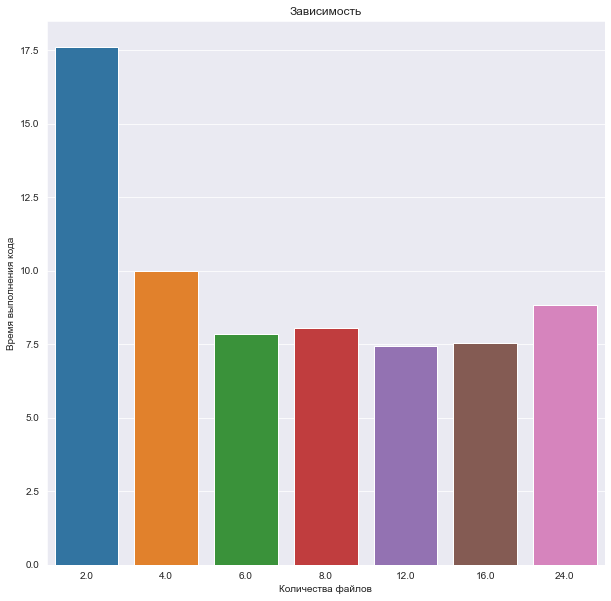

In [101]:
x = [K//6, K//3, K//2, K//1.5, 12, (4/3)*K, 2*K]
y = [17.6, 10, 7.85, 8.06, 7.43, 7.55, 8.84]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(x = x, y = y, ax = ax)
ax.set(title = 'Зависимость', xlabel = 'Количества файлов', ylabel = 'Время выполнения кода')
plt.show()

##### Лучше всего идёт подсчёт там, где количество файлов = кол-во ядер
##### Получается линейная зависимость!

8\. Напишите функцию `parallel_map`, которая принимает на вход серию `s` `pd.Series` и функцию одного аргумента `f` и поэлементно применяет эту функцию к серии, распараллелив вычисления при помощи пакета `multiprocessing`. Логика работы функции `parallel_map` должна включать следующие действия:
* разбиение исходной серии на $K$ частей, где $K$ - количество ядер вашего процессора;
* параллельное применение функции `f` к каждой части при помощи метода _серии_ `map` при помощи нескольких подпроцессов;
* объединение результатов работы подпроцессов в одну серию.

In [83]:
multiprocessing.cpu_count()

12

In [8]:
%%file map_f.py

def series_map(tur):
    return tur[0].map(tur[1])

Overwriting map_f.py


In [4]:
from map_f import series_map

In [5]:
def parallel_map(s: pd.Series, f: callable) -> pd.Series:
    lists = np.array_split(s, 12)
    with multiprocessing.Pool(processes = 12) as pool:
        res = pool.map(series_map, [[lst, f] for lst in lists])
    return pd.concat(res)

In [109]:
%%file map_final_f.py

def map_function(x):
    return x + 10

Overwriting map_final_f.py


In [110]:
from map_final_f import map_function

In [111]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
parallel_map(pd.Series(a), map_function)

0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
dtype: int64

9\. Напишите функцию `f`, которая принимает на вход тэг и проверяет, удовлетворяет ли тэг следующему шаблону: `[любое число]-[любое слово]-or-less`. Возьмите любой фрагмент файла, полученный в задании 1, примените функцию `f` при помощи `parallel_map` к столбцу `tags` и посчитайте количество тэгов, подходящих под этот шаблон. Решите ту же задачу, воспользовавшись методом _серий_ `map`. Сравните время и результат выполнения двух решений.

In [2]:
%%file re_fullmatch.py
import re
def f(tag: str) -> bool:
    pattern = r'\b\d+-[a-zA-Z]+-or-less\b'
    match = re.fullmatch(pattern, str(tag))
    if match:
        return True
    return False

Writing re_fullmatch.py


In [3]:
from re_fullmatch import f

In [6]:
tags = pd.read_csv('new_data/tag_nsteps_1.csv', index_col=0)
tags_for_me = tags.tags

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
%%timeit

parallel_map(tags_for_me.dropna(), f).sum()

4.49 s ± 410 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
tags_for_me.map(f).sum()

8.56 s ± 193 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


10\. Используя пакет `pandarallel`, примените функцию `f` из задания 9 к столбцу `tags` таблицы, с которой вы работали этом задании. Посчитайте количество тэгов, подходящих под описанный шаблон. Измерьте время выполнения кода. Выведите на экран полученный результат.

In [9]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [10]:
%%timeit
tags_for_me.dropna().parallel_map(f).sum()

4.34 s ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
